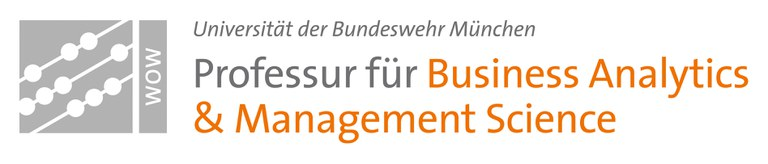

# Maximalfluss - Beispielinstanz Vorlesung - PuLP
### Universität der Bundeswehr München - Prof. Dr. Claudius Steinhardt - Logistics Analytics
Erstellt von Sebastian Knall am 30.03.2022

#### Das vorliegene Notebook bezieht sich auf die Vorlesung Seite 17 im Fach Logistics Analytics. Die Maximalfluss Instanz wird mit dem Open Source Solver PuLP (https://pypi.org/project/PuLP/) gelöst.

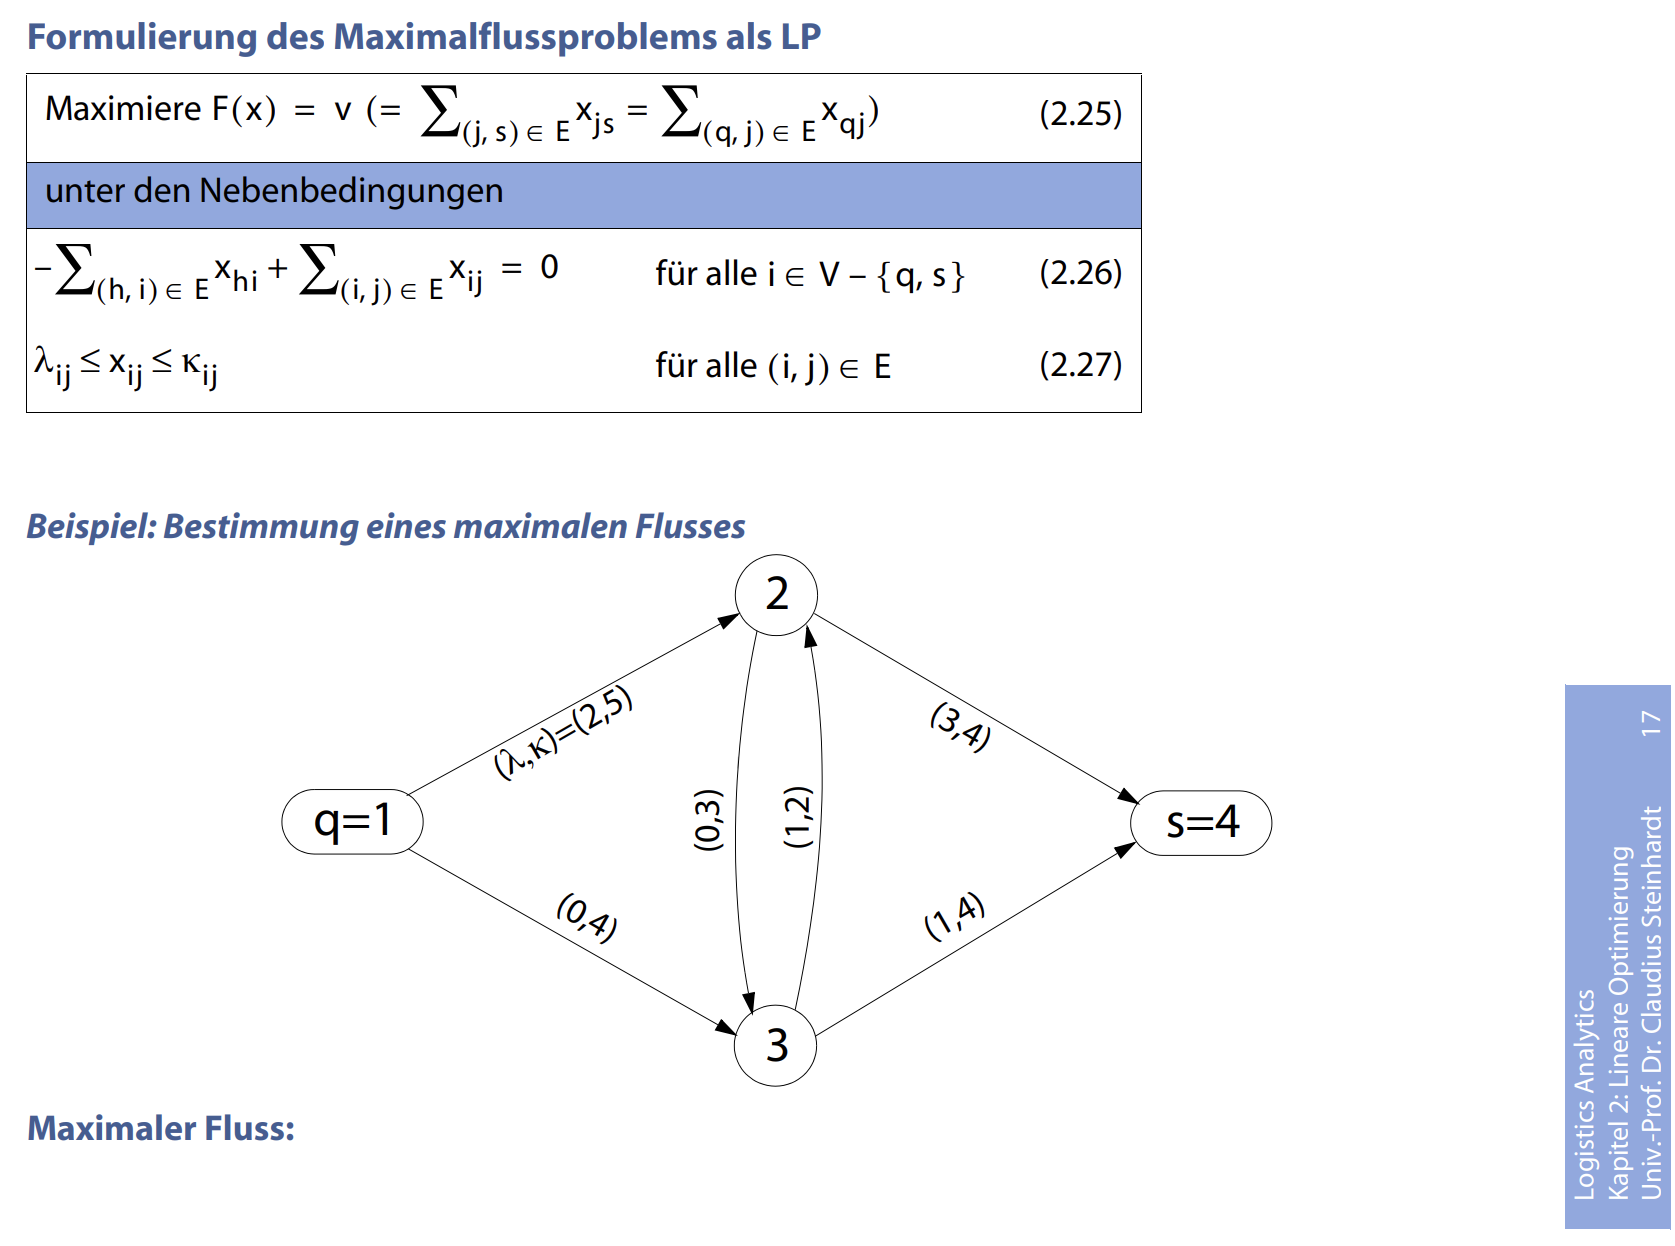

In [1]:
# Importieren der Bibliotheken
import pulp
from pulp import *

In [2]:
# Initialisieren eines neuen PuLP-Modells als Maximierungsproblem
m = LpProblem("Maximalfluss", LpMaximize)

In [3]:
# Initialisierung der Variablen
# Variablen könnten durch vier Parameter spezifiziert werden: Name, untere Grenze, obere Grenze und Typ (ganzzahlig, kontinuierlich, binär)
# Sind keine Parameter angegeben, werden Standardwerte verwendet
# Folglich werden hier duch die minimalen und maximalen Flüsse festgelegt

x12 = LpVariable("Fluss12", 2, 5)
x13 = LpVariable("Fluss13", 0, 4)
x23 = LpVariable("Fluss23", 0, 3)
x24 = LpVariable("Fluss24", 3, 4)
x32 = LpVariable("Fluss32", 1, 2)
x34 = LpVariable("Fluss34", 1, 4)

In [4]:
# Zielfunktion
m += x12 + x13, "Fluss"

In [5]:
# Nebenbedingung, die sicherstellt, dass der Fluss in Knoten 2 erhalten wird
m += x12 + x32 == x23 + x24, "NB01"

In [6]:
# Nebenbedingung, die sicherstellt, dass der Fluss in Knoten 3 erhalten wird
m += x13 + x23 == x32 + x34, "NB02"

In [7]:
# Nebenbedingung, die sicherstellt, dass die Kapazitäten eingehalten werden
# Bei Initialisierung der Variablen bereits sichergestellt

In [9]:
# Modell lösen
m.solve()

1

In [10]:
# Ausgeben des Status
print("Status:", LpStatus[m.status])

Status: Optimal


In [11]:
# Ausgeben der Mengen für die jeweilige Variablen
for v in m.variables():
    print(v.name, "=", v.varValue)
        
# Ausgeben Maximalfluss
print("Maximalfluss: ", value(m.objective))

Fluss12 = 4.0
Fluss13 = 4.0
Fluss23 = 1.0
Fluss24 = 4.0
Fluss32 = 1.0
Fluss34 = 4.0
Maximalfluss:  8.0
